In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


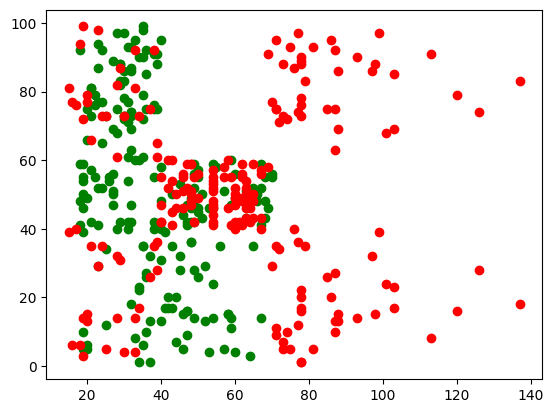

In [3]:
# now we plot scatter plot against various params
plt.scatter(df.Age,df['Spending Score (1-100)'],color='green')
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red')

In [4]:
# lets scale the feature in between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])



In [5]:
# here we annual income and spending rate as a relation
# lets find most appropriate cluster can possible
km_rng = range(1,10)
sse = []
for k in km_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)


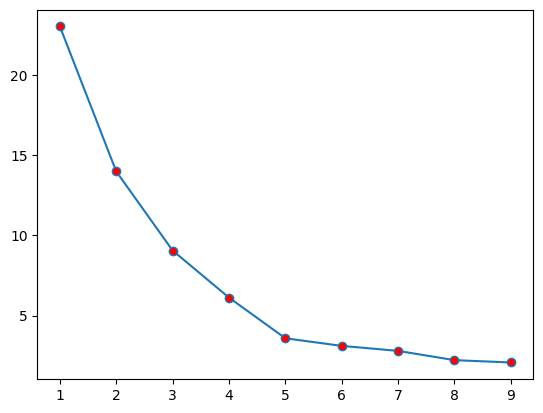

In [6]:
# plot for choosing right cluster number
plt.plot(km_rng,sse,marker="o",markerfacecolor="red")

In [7]:
# we take 5 cluster that shows in chart
km = KMeans(n_clusters=5)
cluster = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
cluster

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4,
       1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2, 4, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [8]:
df["cluster"] = cluster
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,1
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,1
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,1


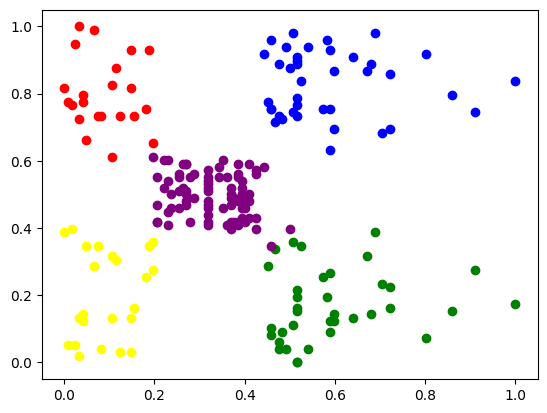

In [9]:
df1 = df[df["cluster"]==0]
df2 = df[df["cluster"]==1]
df3 = df[df["cluster"]==2]
df4 = df[df["cluster"]==3]
df5 = df[df["cluster"]==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='red')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='yellow')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='blue')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='green')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='purple')